# Coursework 1: Gradient Descent (27 Points)
### Autograding
Part 1 of this coursework is autograded. This notebook comes with embedded tests which will verify that your implementations provide outputs with the appropriate types and shapes required for our hidden tests. You can run these same public tests through [LabTS](https://teaching.doc.ic.ac.uk/labts) when you have finished your work, to check that we get the same results when running these public tests.

Hidden tests will be ran after the submission deadline, and cannot be accessed. They mostly check that you didn't cheat by using external functions, or that your implementations generate the correct answers for a few different (sensible) inputs.

### Setup


In [21]:
%pip install -q otter-grader==4.1.0 numpy pandoc seaborn autograd memory-profiler graphviz


[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
# Initialization Cell
%matplotlib inline
import otter
grader = otter.Notebook("mml_cw_1.ipynb")
import matplotlib.pyplot as plt # DO NOT use %matplotlib inline in the notebook
import numpy as np
rng_seed = 90

---
## Part 1 - Differentiation & Gradient Descent (16 points)

In this question, we define the following constants:

$$\boldsymbol{B}=\left(\begin{array}{cc}
4 & -2 \\
-2 & 4
\end{array}\right), \quad \boldsymbol{a}=\left(\begin{array}{l}
0 \\
1
\end{array}\right), \quad \boldsymbol{b}=\left(\begin{array}{c}
-2 \\
1
\end{array}\right)$$

We define also the following functions, which are all $\mathbb{R}^2 \rightarrow \mathbb{R}$
$$
\begin{aligned}
&f_1(\boldsymbol{x})=\boldsymbol{x}^T \boldsymbol{B} \boldsymbol{x}-\boldsymbol{x}^T \boldsymbol{x}+\boldsymbol{a}^T \boldsymbol{x}-\boldsymbol{b}^T \boldsymbol{x} \\
&f_2(\boldsymbol{x})=\cos \left((\boldsymbol{x}-\boldsymbol{b})^T(\boldsymbol{x}-\boldsymbol{b})\right)+(\boldsymbol{x}-\boldsymbol{a})^T \boldsymbol{B}(\boldsymbol{x}-\boldsymbol{a}) \\
&f_3(\boldsymbol{x})=1-\left(\exp \left(-(\boldsymbol{x}-\boldsymbol{a})^T(\boldsymbol{x}-\boldsymbol{a})\right)+\exp \left(-(\boldsymbol{x}-\boldsymbol{b})^T \boldsymbol{B}(\boldsymbol{x}-\boldsymbol{b})\right)-\frac{1}{10} \log \left|\frac{1}{100} \boldsymbol{I}+\boldsymbol{x} \boldsymbol{x}^T\right|\right)
\end{aligned}
$$
Implementations of these functions are provided below.

Throughout this exercise, we remain consistent in our convention of using row vectors for our gradients $\left( \textnormal{i.e. } \frac{\partial f_1}{\partial x}, \frac{\partial f_2}{\partial x}, \frac{\partial f_3}{\partial x} \in \mathbb{R}^{1 \times 2} \right )$. 


In [23]:
# Defined constants
B = np.array([[4, -2], [-2, 4]])
a = np.array([[0], [1]])
b = np.array([[-2], [1]])

def f1(x):
    """ Function f1 taking input x with shape (2, 1) """
    return float(x.T @ B @ x - x.T @ x + a.T @ x - b.T @ x)

def f2(x):
    """ Function f2 taking input x with shape (2, 1) """
    return float(np.cos((x - b).T @ (x - b)) + (x - a).T @ B @ (x - a))

def f3(x):
    """ Function f3 taking input x with shape (2, 1) """
    return float(1 - (np.exp(-(x - a).T @ (x - a)) + \
                 np.exp(-(x - b).T @ B @ (x - b)) - \
                 (1/10.) * np.log(np.linalg.det((1/100.) * np.identity(2) + x @ x.T))))

---
### Question 1 - Checking for the existence of Minima (2 Points)
Complete the function ```f1_check_minimum(B, a, b)``` that checks whether function $f_1$ has a minimum given certain values of **a**, **b** and diagonal **B**.

Hint: you may not need to use all three gradients

In [24]:
def f1_check_minimum(B, a, b):
    """ Write a function that returns True if function f1 has a minimum for variables B, a and b, and returns False otherwise.
        Hint: it may not be required to use all B, a and b. """
    # YOUR CODE HERE
        
    diag_elements = np.diag(B)
    check = np.all(diag_elements >= 1)
    return check 

In [25]:
grader.check("1. Function 1 Minima Check")

1. Function 1 Minima Check results: All test cases passed!
1. Function 1 Minima Check - 1 message: F1 Minimum Check (with minimum) Test Passed

---
### Question 2 - Calculating Gradients (6 Points)
#### Question 2.a - Method of Finite Differences (2 Points)
Remember (animation in lectures) that a gradient is found by taking
$$ \lim _{\Delta x \rightarrow 0} \frac{f(x+\Delta x)-f(x)}{\Delta x} $$
We can approximate this by calculating the expression for a small but finite $\Delta x$ along each dimension, which
is known as the _finite-differences_ approximation.

Complete the function ```grad_fn(fn, x)``` such that it returns the gradients for any function ```fn``` at a point **x** using the method of finite differences. Use a delta of $1\times 10^{-5}$.

_The function should take a columnar numpy (2, 1) vector for ‘x’ as input, and output a
numpy (1, 2) row vector for the gradient._

In [26]:
def grad_fd(fn, x, delta=1e-5):
    """ General function that calculates gradient of some 2d function at point x,
        using finite-differences.

    Inputs:
            fn: Function taking input x and returns a scalar
            x: Numpy vector of shape (2, 1)
            delta: Finite-difference delta (epsilon) used for approximation

    Returns: Approximated gradient at point x, in shape (1, 2)
    """
    # YOUR CODE HERE
    x = x.astype(float)
    dfdx = np.zeros((2,))
    for i in range(2):
        x_dx = np.copy(x)
        x_dx[i] += delta
        dfdx[i] = (fn(x_dx) - fn(x)) / delta
    return dfdx.reshape(1, 2)

In [27]:
grader.check("2.a Method of Finite Differences")

2.a Method of Finite Differences results: All test cases passed!
2.a Method of Finite Differences - 1 message: Finite Differences on f1 Test Passed
2.a Method of Finite Differences - 2 message: Finite Differences on f2 Test Passed

---
#### Question 2.b - Analytical Gradients (4 Points)
Complete the functions ```f1_grad(x)```, ```f2_grad(x)``` and ```f3_grad(x)``` that return
gradients of f1, f2 and f3, using your own derivations.

_The functions should take a columnar numpy (2, 1) vector for **x** as input, and output a
numpy (1, 2) row vector for the gradient_

In [28]:
def f1_grad_exact(x):
    """ Return gradient of f1, exactly derived by hand """
    # YOUR ANSWER HERE
    gradient = 2 * x.T @ B - 2 * x.T + a.T - b.T
    return gradient.reshape(1,2)

In [29]:
grader.check("Q2.b.i Gradients of the Functions - f1")

Q2.b.i Gradients of the Functions - f1 results: All test cases passed!
Q2.b.i Gradients of the Functions - f1 - 1 message: Exact Gradients of f1 Test Passed

In [30]:
def f2_grad_exact(x):
    """ Return gradient of f2, exactly derived by hand """
    # YOUR ANSWER HERE
    gradient = - 2 * np.sin((x-b).T @ (x-b)) * (x - b).T + 2 * (x-a).T @ B
    return gradient.reshape(1,2)

In [31]:
grader.check("Q2.b.ii Gradients of the Functions - f2")

Q2.b.ii Gradients of the Functions - f2 results: All test cases passed!
Q2.b.ii Gradients of the Functions - f2 - 1 message: Exact Gradients of f2 Test Passed

In [32]:
def f3_grad_exact(x):
    """ Return gradient of f3, exactly derived by hand """
    gradient = 2* (x-a).T * np.exp(-(x-a).T@(x-a)) + 2* np.exp(-(x-b).T@B@(x-b)) *(x-b).T @B + 1/(5 * x.T@x + 1/20) * x.T 
    return gradient.reshape(1, 2)

In [33]:
f3_grad_exact(np.array([[2.5],[3.5]]))
grader.check("Q2.b.iii Gradients of the Functions - f3")

Q2.b.iii Gradients of the Functions - f3 results: All test cases passed!
Q2.b.iii Gradients of the Functions - f3 - 1 message: Exact Gradients of f2 Test Passed

In [34]:
# (optional) It's a good idea to test whether your analytical gradients 
# _closely_ match those given by finite differencing
print(f1_grad_exact(np.array([[5],[9]])))
print(grad_fd(f1, np.array([[5],[9]])))
print(f2_grad_exact(np.array([[2.5],[3.5]])))
print(grad_fd(f2, np.array([[2.5],[3.5]])))
print(f3_grad_exact(np.array([[2.5],[3.5]])))
print(grad_fd(f3, np.array([[2.5],[3.5]])))

[[-4 34]]
[[-3.99997 34.00003]]
[[1.18578121 5.10321178]]
[[1.18572957 5.10321673]]
[[0.02703106 0.03783603]]
[[0.02703107 0.03783601]]


---
### Question 3 - Gradient Descent (8 Points)
Use your gradients to implement a gradient descent algorithm **with 50 iterations**
to find a local minimum for both f2 and f3, by finishing the function grad descent(fn,
grad fn).

For visualizing (and debugging) your gradient descent function, we provide some plotting code. This is contained in the cell below, so be sure to exectue it. You can use this function on f1 by passing in the other functions, for example: ```plot_grad_descent(f1, f1_grad_exact, gradient_descent)``` once you have completed the ```gradient_descent(fn, grad_fn)``` function. You can also pass in ```xrange=(x_min, x_max)``` and likewise for ```yrange``` to adjust the plotted region.

In [35]:
# Provide function for plotting gradient descent
import matplotlib.pyplot as plt
def plot_grad_descent(fn, fn_grad, gradient_descent_fn, xrange=(-1, 1), yrange=(-1,1), **kwargs):
    title = 'Plotting function #'+ fn_grad.__name__.split('_')[0][-1]
    # Define plotting range for x- and y- axis.
    x1min, x1max = xrange
    x2min, x2max = yrange

    # Evaluate function everywhere within the defined range for the contour plot
    x1 = np.linspace(x1min, x1max, 100)
    x2 = np.linspace(x2min, x2max, 100)

    X1, X2 = np.meshgrid(x1, x2)

    Y = [fn(np.array([[p1], [p2]])) for p1, p2 in zip(X1.flatten(), X2.flatten())]
    Y = np.array(Y).reshape(X1.shape)

    # Plot contour
    plt.title(title)
    plt.xlim(x1min, x1max)
    plt.ylim(x2min, x2max)
    plt.contourf(X1, X2, Y)
    plt.colorbar()

    # Plot gradient descent trajectory
    trajectory, found_minimum, found_minimum_value = gradient_descent_fn(fn, fn_grad, **kwargs)

    p1, p2 = zip(*trajectory)
    plt.plot(p1, p2, '.-', color='red')

#### Question 3.a - Implementing Gradient Descent (4 Points)
Complete the ```gradient_descent``` function below.

In [36]:
def gradient_descent(fn, grad_fn, start_x=4.0, start_y=4.0, lr=0.001, n_steps=50, silent=False):
    """ Function that performs gradient descent.

    Inputs: 
        - fn: Function to minimize
        - grad_fn: Function that returns gradient of the function to minimize
        - start_loc: Initial location
        - lr: The learning rate
        - n_steps: Number of steps
        - silent: prevent print statement (for testing)

    Returns: Tuple containing:
        - trajectory of found points: a list containing numpy (2, 1) column vectors
        - final minimum point: a numpy (2, 1) column vector
        - the value at the minimum: float
    """

    start_loc = np.array([[start_x], [start_y]])
    trajectory = [start_loc]
    found_minimum_loc, found_minimum_value = None, float('inf')
    for _ in range(n_steps):
        derivative = grad_fn(trajectory[-1])
        new_loc = trajectory[-1] - lr * derivative.T
        new_value = fn(new_loc)
        trajectory.append(new_loc)
        
        if new_value<found_minimum_value:
            found_minimum_value, found_minimum_loc = new_value, new_loc
    
    if not silent:
        print(f"Gradient descent found minimum value {found_minimum_value:.2f} at {found_minimum_loc.T}^T")
    return trajectory, found_minimum_loc, found_minimum_value

Gradient descent found minimum value -0.60 at [[-0.59995005 -0.39995005]]^T


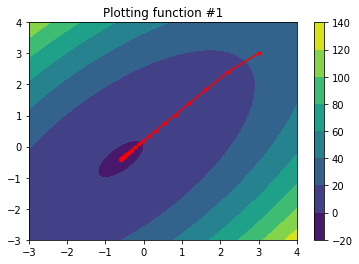

In [37]:
# Here we'll use the plotting function and specify custom starting points and plotting ranges
plot_grad_descent(f1, f1_grad_exact, gradient_descent,
                  xrange=(-3, 4), yrange=(-3, 4),
                  start_x=3, start_y=3, lr=0.1
)

**Note** The last two tests should be run after the first one

In [38]:
grader.check("Gradient Descent")

Gradient Descent results: All test cases passed!
Gradient Descent - 1 message: Gradient Descent Trajectory Test Passed
Gradient Descent - 2 message: Gradient Descent Minimum Location Test Passed
Gradient Descent - 3 message: Gradient Descent Minimum Value Test Passed

#### Question 3.b - Choosing Good Initializations (2 Points)


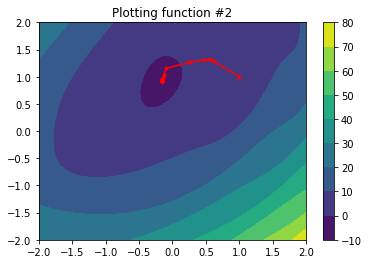

In [39]:
# Here we'll use the plotting function and specify custom starting points and plotting ranges
# For F2 
f2_start_x = 1
f2_start_y = 1
f2_lr = 0.07
f2_n_steps = 50

plot_grad_descent(f2, f2_grad_exact, gradient_descent,
                  xrange=(-2, 2), yrange=(-2, 2),
                  start_x=f2_start_x, start_y=f2_start_y, lr=f2_lr, n_steps=f2_n_steps, silent=True
)

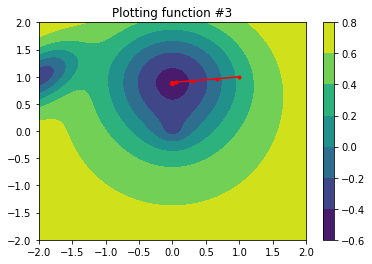

In [40]:
# For F3 
f3_start_x = 1 
f3_start_y = 1
f3_lr = 0.4
f3_n_steps = 50

plot_grad_descent(f3, f3_grad_exact, gradient_descent,
                  xrange=(-2, 2), yrange=(-2, 2),
                  start_x=f3_start_x, start_y=f3_start_y, lr=f3_lr, n_steps=f3_n_steps, silent=True
)

#### Question 3.c - Failure to Converge (2 Points)
Find an example of diverging behaviour and describe three ways that we can encourage convergence in practice.

<!-- BEGIN QUESTION -->



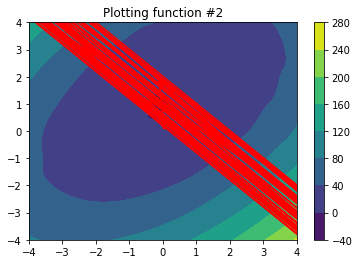

In [41]:
# SHOW: Example of diverging behaviour
# call plot_grad_descent(...) in this cell
f2_start_x = 1
f2_start_y = 1
f2_lr = 0.2
f2_n_steps = 50
plot_grad_descent(f2, f2_grad_exact, gradient_descent,
                  xrange=(-4, 4), yrange=(-4, 4),
                  start_x=f2_start_x, start_y=f2_start_y, lr=f2_lr, n_steps=f2_n_steps, silent=True
)

**Answer:**
Divergent behaviour during gradient descent occurs when the inital parameters are misconfigured. There are 3 common ways to reduce chances of obtaining divergent behaviours. 

Firstly, learning rate can be adjusted to prevent divergence. When learning rate is too high, it would cause the update step of parameters to overshoot and fail to reach the minimum value. To prevent overshooting, learning rate can be adjusted to a lower value. Adaptive learning rate methods such as Adam or Adagrad optimiser can also be used to automatically adjust the learning rate during training. Decaying earning rate can also be used so smaller steps are taken as the parameters get closer to the minimum.

Secondly, gradient clipping technique can be used to scale down gradients exceeding a certain value. The technique involves setting a threshold value for the gradient, so the gradient is always clipped between the threshold values. This prevents a massive update step when the gradient is too high (exploding gradient), increasing the chance of convergence.

Lastly, careful initialization of parameters and initial values can prevent divergence. In neural networks with gradient descent, He and Xavier Initialisation techniques are commonly used to initialise weights with ReLU and Sigmoid activation functions respectively. This would prevent exploding or vanishing gradient problems in deep neural networks. 

<!-- END QUESTION -->

---
## Part 2 - Automatic Differentation (11 Points)

In the previous part you saw how you can implement gradient descent to optimize functions by using either approximate or analytical gradients. Luckily for us, there are frameworks which implement derivatives for most functions we might typically care about, and which allow us to differentiate through arbitrary compositions of these functions by using **Automatic Differentiation** (autodiff). Indeed, you may already have encountered frameworks such as PyTorch, TensorFlow or Jax which have robust autodiff implementations.

In this part we'll demonstrate the power of autodiff through the [autograd](https://github.com/HIPS/autograd) library which provides a clean interface for automatically differentiating over numpy functions. Let's start by taking a look at the syntax for computing gradients in autograd:

In [42]:
from autograd import grad 
import autograd.numpy as np # Autograd wraps numpy to support automatic differentiation
# Note that particularly niche numpy functions may not be supported by autograd

# Consider the sum of squares function
def xsq(x): 
    return np.sum(x**2)

# We know the gradient of this! 
def our_grad_of_xsq(x):
    return 2*x

x = np.random.rand(4)

# We can wrap functions with grad to get the gradient function
autograd_grad_of_xsq = grad(xsq, 0) # 0 => want the gradient with respect to the first argument

# Evaluate gradients at x and check that they're the same
print(autograd_grad_of_xsq(x))
print(our_grad_of_xsq(x))

[0.01825732 0.05601831 1.11561773 0.76866653]
[0.01825732 0.05601831 1.11561773 0.76866653]


---
### Question 4 - Squared Distances and Automatic Differentiation
Although we can see that autograd is perfectly capable of computing derivatives by itself, there may be instances where the derivative of a non-elementary function is analytically *more efficient* than the composition of the gradients of its components. This means that we are better off telling autograd to use our derivate when it performs automatic differentation (sometimes we might also use esoteric functions which don't even have an existing derivate, in which case we are forced to provide one).

#### Question 4.a - Forward Pass of the Squared Distances function (1 Point)
In particular, we'll consider the gradient of 
$$ \vec{s} = \vec{p}^T \mathbf{D} \vec{q}, $$
with respect to $\vec{z}$, where $\vec{p}$ and $\vec{q}$ are constants, and $\mathbf{D}$ is the matrix of squared distances between elements of $\vec{z}$:
$$ D_{ij} = \exp(-(z_i - z_j)^2). $$

Get warmed up by implementing the the function ```sq_dist_fwd(p,q,x)``` which computes $\vec{s}$.

In [43]:
import autograd.numpy as np
from autograd import grad
np.random.seed(0)

# Naive solution
p = np.random.rand(4)
q = np.random.rand(4)
def sq_dist_fwd(p,q,x):
    """ Compute the inner product of p and q, projected through a matrix consisting of the 
        squared distance between elements of a variable x. All vectors are length x.shape[0].
        To be compatible with autograd, we need to avoid using assignments on array indices 
    """
    
    N = x.shape[0]
    assert N % 2 == 0 # We expect even numbers of elements
    assert x.shape[0] == p.shape[0] == q.shape[0]
    z = x[:, None]
    D = np.exp(-((z - z.T)**2))
    out = p.T@D@q
    return out 

In [44]:
grader.check("Q4.a Squared Distance Function")

Q4.a Squared Distance Function results: All test cases passed!
Q4.a Squared Distance Function - 1 message: Squared Distance Function Output Shape Test Passed

#### Question 4.b - Analytical Derivate of Squared Distances (2 Points)
In order to override autograd's gradient for our squared distance function, we need to derive it ourselves - compute the derivate:
$$\frac{\partial \vec{s}}{\partial \vec{z}} =\sum_{i j} a_i b_j \frac{\partial D_{i j}}{\partial \vec{z}}, $$
with respect to one element of $\vec{z}$.


<!-- BEGIN QUESTION -->

**Answer:**
The expanded form is the following when differentiate with respect to $\vec{z_k}$
$$\frac{\partial \vec{s}}{\partial z_k} =\sum_{i j} a_i b_j \frac{\partial \exp(-(z_i - z_j)^2)}{\partial z_k}, $$


Case 1: When $k = i$,
$$\frac{\partial \vec{s}}{\partial z_i} =\sum_{i j} a_i b_j \frac{\partial \exp(-(z_i - z_j)^2)}{\partial z_i}, $$
$$\frac{\partial \vec{s}}{\partial z_i} = - 2 \sum_{i j} a_i b_j (z_i - z_j) \exp(-(z_i - z_j)^2) $$

Case 2: When $k = j$,
$$\frac{\partial \vec{s}}{\partial z_j} =\sum_{i j} a_i b_j \frac{\partial \exp(-(z_i - z_j)^2)}{\partial z_j}, $$
$$\frac{\partial \vec{s}}{\partial z_j} = 2 \sum_{i j} a_i b_j (z_i - z_j) \exp(-(z_i - z_j)^2) $$

Case 3: When $ k \ne i \ne j$,
$$\frac{\partial \vec{s}}{\partial z_k} =\sum_{i j} a_i b_j \frac{\partial \exp(-(z_i - z_j)^2)}{\partial z_k}, $$
$$\frac{\partial \vec{s}}{\partial z_k} = 0 $$





<!-- END QUESTION -->

#### Question 4.c - Implement the Derivative (2 Points)
With the analytical derivate in hand, complete the ```sq_dist_grad_elem(a, b, x, z)``` function which computes the gradient with respect to the $n^{th}$ dimension of $\vec{z}$ and the corresponding function ```sq_dist_grad``` which computes the gradient vector.



In [45]:
# Implement your analytical gradients here

# Gradient w.r.t nth element of z
# NOTE - you can ignore this function if you prefer to vectorize your implementation
def sq_dist_grad_elem(p, q, z, n):
    gradient = 0
        
    for i in range(len(p)):
        for j in range(len(q)):
            d_ij = np.exp(-(z[i] - z[j]) ** 2)
            if n == i:
                gradient += -2 * p[i] * q[j] * d_ij  * (z[i] - z[j])
            elif n == j:
                gradient += 2 * p[i] * q[j] * d_ij * (z[i] - z[j])
    return gradient

# Gradient w.r.t the whole vector z
def sq_dist_grad(p, q, z):
    grad_vector = np.zeros_like(z)
    for n in range(len(z)):
        grad_vector[n] = sq_dist_grad_elem(p, q, z, n)
    return grad_vector

In [46]:
grader.check("Q4.c Squared Distance Function Gradients")

Q4.c Squared Distance Function Gradients results: All test cases passed!
Q4.c Squared Distance Function Gradients - 1 message: Squared Distance Gradient Function Shape Test Passed

In [47]:
# (optional) It is a good idea to check the output of your gradient
# function against the one generated by autograd
autograd_of_sq_dist_grad = grad(sq_dist_fwd, 2)
print(autograd_of_sq_dist_grad(p, q, x))
print(sq_dist_grad(p, q, x))


[ 0.89673643  1.15842398 -1.22566328 -0.82949713]
[ 0.89673643  1.15842398 -1.22566328 -0.82949713]


#### Question 4.d - Automatic Differentiation (2 Points)

Armed with our superior gradient function for the sum of squared distances, let's tell autograd to use it, and convince ourselves that all our hardwork was worthwhile!

First, let's compare memory usage to check whether our implementation actually requires less memory:

In [48]:
%load_ext memory_profiler
p,q,z = np.random.randn(200), np.random.randn(200), np.random.randn(200)
print('Ours: ', end=' ')
%memit sq_dist_grad(p,q,z)
print('Theirs:', end=' ')
%memit grad(sq_dist_fwd, 2)(p,q,z) 

Ours:  

peak memory: 127.22 MiB, increment: 0.07 MiB
Theirs: peak memory: 129.12 MiB, increment: 2.06 MiB


You should see that our implementation of the gradient function requires considerably less memory than the one autograd provides by using autodiff. 

Now let's tell autograd to use our analytically derived gradient function when computing autodiff for a more complicated function:
$$ \vec{y} = \vec{s} = \vec{p}^T \mathbf{D}(\vec{z}) \vec{q}, \quad \text{and} \quad \vec{z} = 3\sin{x}+5$$

We'll start by revisiting our toy example of $x^2$.

In [49]:
from autograd.extend import primitive, defvjp
# First we'll consider the x squared example again

@primitive # This tells autograd we will define the gradient ourselves
def xsq(x): 
    return np.sum(x**2)

# Here's an example of how to define a custom backward pass gradient function
def xsq_vjp(ans, x):
    """ This should return a function which takes the gradient (g) of the SUBSEQUENT function
        and combines it with the gradient of the function we're differentiating 
        (i.e. propagating the accumulated gradient backwards through the graph)
    """
    print('We are constructing the computational graph')

    def xsq_vjp_inner(g):
        print('We are auto differentiating')
        print(f'gradient in was {g}, answer in was {ans}\n')
        return 2*x*g
    
    print('The gradient function has been stored in the graph \n')
    return xsq_vjp_inner

defvjp(xsq, xsq_vjp)

print('Gradient out: ', grad(xsq)(np.array([1., 2., 3.])))

We are constructing the computational graph
The gradient function has been stored in the graph 

We are auto differentiating
gradient in was 1.0, answer in was 14.0

Gradient out:  [2. 4. 6.]


Now let's apply the same idea to our squared distance function

In [50]:
from functools import partial 
# We'll overwrite the naive solution with a primitive
# to make life easier let's fix p and q with "partial"
p,q,z = np.random.randn(4), np.random.randn(4), np.random.randn(4)
sq_dist_fwd_wrapped = partial(sq_dist_fwd, p, q)
sq_dist_grad_wrapped = partial(sq_dist_grad, p, q)

@primitive # Tell autograd we'll use a custom gradient for sq_dist
def sq_dist(z):
    # Function returns the squared distance with p,q fixed
    return sq_dist_fwd_wrapped(z)
    
def sq_dist_vjp(ans, z): 
    # Return a function which takes the gradient of the SUBSEQUENT function
    # and combines it with the gradient of sq_dist
    def sq_dist_vjp_inner(g):
        # print('We are auto differentiating')
        # print(f'gradient in was {g}, answer in was {ans}\n')
        return sq_dist_grad_wrapped(z)*g
    
    # print('The gradient function has been stored in the graph \n')
    return sq_dist_vjp_inner

defvjp(sq_dist, sq_dist_vjp) # Assign backward gradient sq_dist_vjp to sq_dist function

In [51]:
grader.check("Q4.d Squared Distance Autodiff")

Q4.d Squared Distance Autodiff results: All test cases passed!
Q4.d Squared Distance Autodiff - 1 message: Squared Distance Autodiff Value Test Passed

#### Question 4.e - Understanding Autodiff (4 Points)
Now that we've seen how to define custom gradients for autodiff, let's double check our understanding:
1. Draw the computational graph for the ```complete_function(x)```, defined below
2. Estimate the Memory and Time complexity of the autodiff gradient calculation, and compare this to ours

In [52]:
# consider the function
x = np.random.rand(4)
z = np.sin(x)*3 + 5
y = sq_dist(z)

# we can compute the gradient of y with respect to x using autograd
def complete_function(x):
    z = np.sin(x)*3 + 5
    return sq_dist(z) # This will now use our gradient function!

grad(complete_function)(x)

array([ 0.23172885,  0.78618556,  0.35162523, -1.24103674])

<!-- BEGIN QUESTION -->



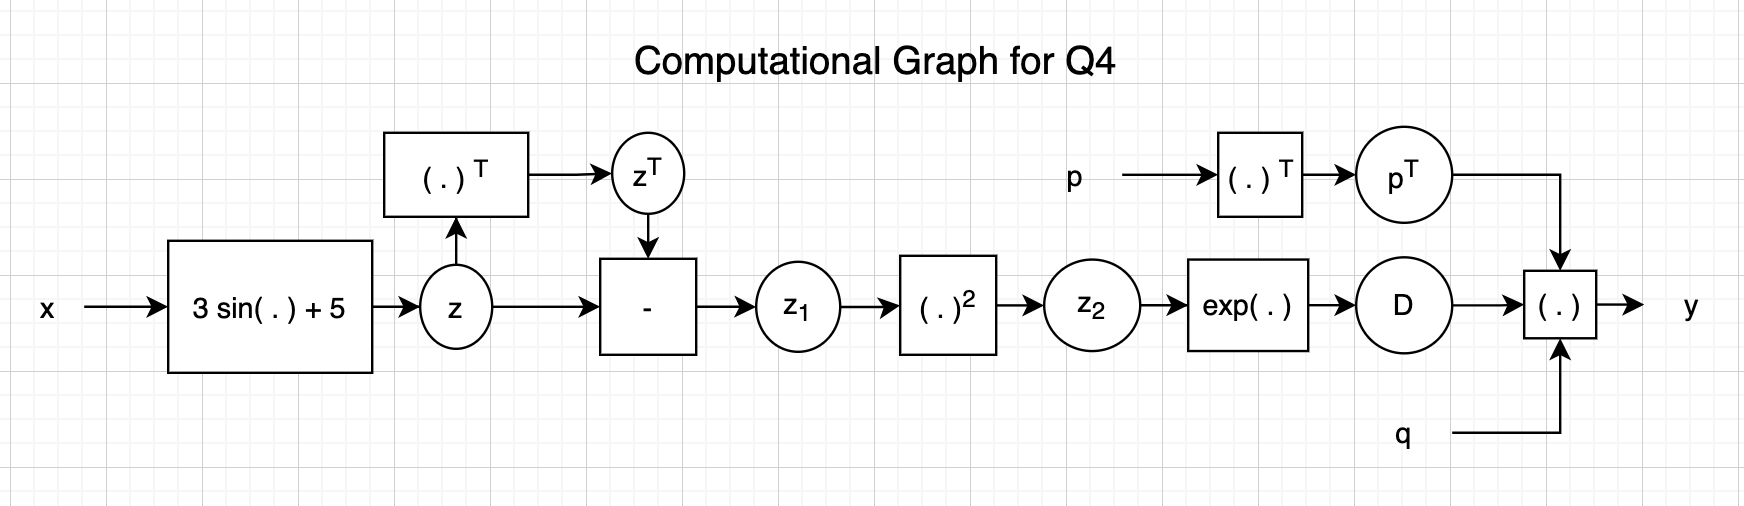

In [53]:
"""Question 4.e.i - Create a (rough) computational graph for the function
   NOTE the following:
    1. You do not have to use graphviz (example given here) - you can 
       use tools such as https://draw.io or https://www.lucidchart.com
       and embed the results into this notebook (or upload them and provide
       a link) - just be sure to check that they appear in the LabTS output
       PDF
    2. If you want to use Graphviz, you will need to install it on your machine
       (from https://www.graphviz.org/download) or work on one of the DoC machines. 
"""

from IPython.display import Image, display

# I created the graph below using draw.io and uploaded it to a assets folder in this repository.
image_path = 'assets/computational_graph.png'

# Display the image
display(Image(filename=image_path))

**Question 4.e.ii - Complexity Answer:**

There are two approaches used in computing Automatic Differentiation in Q4: 1. Analytical Answer we developed; 2. Automatic Differentiation using autograd. When computing complexity, we assume size of x to be $N \times 1$

Complexity of Analytical Answer:

The overall time and memory complexity of my implementation are $O(N^3)$ and $O(N)$ respectively. There are three main steps involved in computing automatic differentiation wrt x. The first step takes in differentiating z wrt x, which has a time and memory complexity of O(N). The second step involves the function 
sq_dist_grad_elem(p, q, z, n) which has two nested loops, each iterating over the lengths of p and q, respectively.
Since len(p) is N and len(q) is N, the nested loops result in $O(NxN)$ which is $O(N^2)$ time complexity.
The second function sq_dist_grad(p, q, z) calls sq_dist_grad_elem for every element in z, therefore calling sq_dist_grad_elem N times resulting in an overall $O(N^3)$ time complexity. Memory complexity is $O(N)$ as only the final vector with N elements is stored in memory. Thus, the time and memory complexity are $O(N^3)$ and $O(N)$ respectively.

Complexity of Automatic Differentiation using autograd:

The overall time and memory complexity of my implementation are both $O(N^4)$. To analyse the complexity, we can break down the automatic differentiation. 
Priaml and their size:
$$
\begin{align*}
z    &= 3 \sin(x) + 5, & z &\in \mathbb{R}^{N \times 1} \\
z_1  &= z - z^T,       & z_1 &\in \mathbb{R}^{N \times N} \\
z_2  &= z_1^2,         & z_2 &\in \mathbb{R}^{N \times N} \\
D    &= \exp(z_2),     & D &\in \mathbb{R}^{N \times N} \\
y    &= p^T D q,       & y &\in \mathbb{R}
\end{align*}
$$
Gradient, their size, and complexity:
$$
\begin{align*}

\frac{\partial z}{\partial x}   &= 3 \, \text{diag}(\cos(x)), & \frac{\partial z}{\partial x} &\in \mathbb{R}^{N \times N} & O(N^2) \\
\frac{\partial z_1}{\partial z} &= I,                        & \frac{\partial z_1}{\partial z} &\in \mathbb{R}^{N \times N} & O(N^2)\\
\frac{\partial z_1}{\partial z^T} &= -I,                     & \frac{\partial z_1}{\partial z^T} &\in \mathbb{R}^{N \times N} & O(N^2)\\
\frac{\partial z_2}{\partial z_{1ij}} &= \frac{\partial z_1^2}{\partial z_{1ij}}, & \frac{\partial z_2}{\partial z_{1ij}} &\in \mathbb{R}^{(N \times N) \times (N \times N)} & O(N^4) \\
\frac{\partial D}{\partial z_{2ij}}    &= \frac{\partial exp(z_2)}{\partial z_{2ij}},     & \frac{\partial D}{\partial z_{2ij}} &\in \mathbb{R}^{(N \times N) \times (N \times N)} & O(N^4)\\
\frac{\partial y}{\partial D_{ij}}    &= \frac{\partial p^T D q} {\partial D_{ij}},       & \frac{\partial y}{\partial D_{ij}} &\in \mathbb{R}^{1 \times (N \times N)} & O(N^2)
\end{align*}
$$

Since the overall complexity is bounded by the largest intermediate complexity, the required time complexity and memory complexity are both $O(N^4)$ 




<!-- END QUESTION -->

---
## Submission
Once you have completed all questions and re-ran all tests, simply push your final notebook to gitlab. You'll want to go to the [LabTS Exercise](https://teaching.doc.ic.ac.uk/labts/lab_exercises/2223/exercises/732/exercise_summary) and check that there are no strange bugs on our end - note that the test results you see on LabTS should be identical to the tests provided in this notebook; of course, we also have other tests which will be run for marking purposes

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [54]:
grader.check_all()

1. Function 1 Minima Check results: All test cases passed!
1. Function 1 Minima Check - 1 message: F1 Minimum Check (with minimum) Test Passed

2.a Method of Finite Differences results: All test cases passed!
2.a Method of Finite Differences - 1 message: Finite Differences on f1 Test Passed
2.a Method of Finite Differences - 2 message: Finite Differences on f2 Test Passed

Gradient Descent results: All test cases passed!
Gradient Descent - 1 message: Gradient Descent Trajectory Test Passed
Gradient Descent - 2 message: Gradient Descent Minimum Location Test Passed
Gradient Descent - 3 message: Gradient Descent Minimum Value Test Passed

Gradient Descent Initialization results: All test cases passed!

Q2.b.i Gradients of the Functions - f1 results: All test cases passed!
Q2.b.i Gradients of the Functions - f1 - 1 message: Exact Gradients of f1 Test Passed

Q2.b.ii Gradients of the Functions - f2 results: All test cases passed!
Q2.b.ii Gradients of the Functions - f2 - 1 message: Exact G